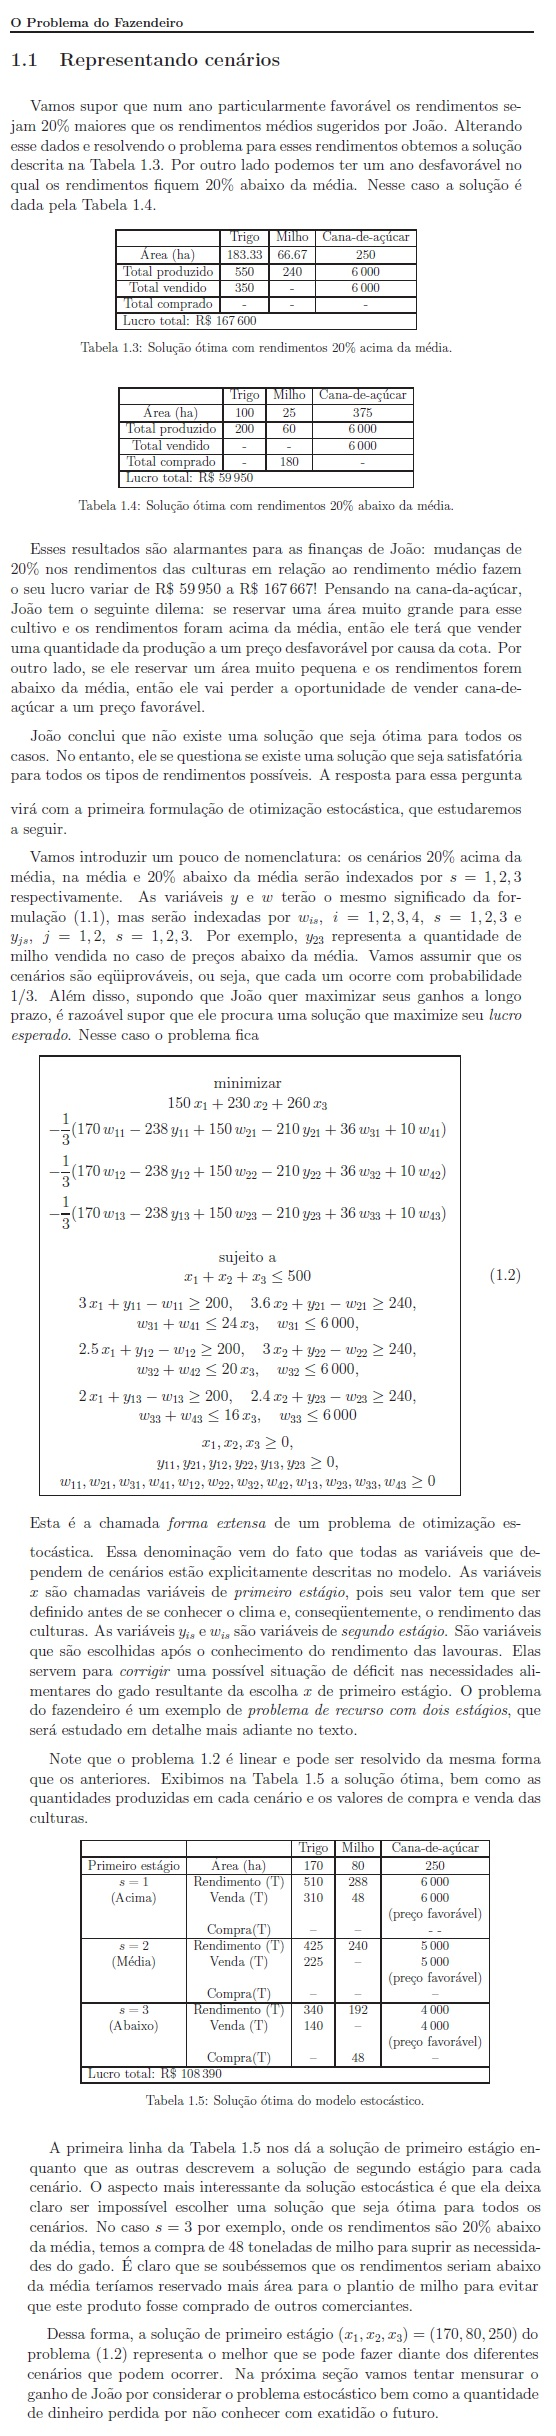

In [1]:
# Kernel = Pyomo-Lessons (Python 3.11.4) - C:\Users\Sandro\anaconda3\envs\Pyomo-Lessons\python.exe

import pyomo.environ as pyo
from prettytable import PrettyTable

In [2]:
# Declaração do modelo:
modelo = pyo.ConcreteModel()

In [3]:
# Variáveis de decisão:
modelo.x1 = pyo.Var(within=pyo.NonNegativeReals)
modelo.x2 = pyo.Var(within=pyo.NonNegativeReals)
modelo.x3 = pyo.Var(within=pyo.NonNegativeReals)

modelo.y11 = pyo.Var(within=pyo.NonNegativeReals)
modelo.y12 = pyo.Var(within=pyo.NonNegativeReals)
modelo.y13 = pyo.Var(within=pyo.NonNegativeReals)

modelo.y21 = pyo.Var(within=pyo.NonNegativeReals)
modelo.y22 = pyo.Var(within=pyo.NonNegativeReals)
modelo.y23 = pyo.Var(within=pyo.NonNegativeReals)

modelo.w11 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w21 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w31 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w41 = pyo.Var(within=pyo.NonNegativeReals)

modelo.w12 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w22 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w32 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w42 = pyo.Var(within=pyo.NonNegativeReals)

modelo.w13 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w23 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w33 = pyo.Var(within=pyo.NonNegativeReals)
modelo.w43 = pyo.Var(within=pyo.NonNegativeReals)



In [4]:
# Função objetivo:
modelo.z = pyo.Objective(expr=
                              150*modelo.x1 + 230*modelo.x2 + 260*modelo.x3 -
                             (1/3)*(170*modelo.w11 - 238*modelo.y11 + 150*modelo.w21 - 210*modelo.y21 + 36*modelo.w31 + 10*modelo.w41) -
                             (1/3)*(170*modelo.w12 - 238*modelo.y12 + 150*modelo.w22 - 210*modelo.y22 + 36*modelo.w32 + 10*modelo.w42) -
                             (1/3)*(170*modelo.w13 - 238*modelo.y13 + 150*modelo.w23 - 210*modelo.y23 + 36*modelo.w33 + 10*modelo.w43),
                              sense=pyo.minimize)

In [5]:
# Restrições:
modelo.restr_hectares = pyo.Constraint(expr = modelo.x1 + modelo.x2 + modelo.x3 <= 500)

In [6]:
modelo.restr_trigo_S1 = pyo.Constraint(expr = 3*modelo.x1 + modelo.y11 - modelo.w11 >= 200)
modelo.restr_milho_S1 = pyo.Constraint(expr = 3.6*modelo.x2 + modelo.y21 - modelo.w21 >= 240)
modelo.restr_cana_Area_S1 = pyo.Constraint(expr = modelo.w31 + modelo.w41 <= 24*modelo.x3)
modelo.restr_cana_Prod_S1 = pyo.Constraint(expr = modelo.w31 <= 6000)

In [7]:
modelo.restr_trigo_S2 = pyo.Constraint(expr = 2.5*modelo.x1 + modelo.y12 - modelo.w12 >= 200)
modelo.restr_milho_S2 = pyo.Constraint(expr = 3*modelo.x2 + modelo.y22 - modelo.w22 >= 240)
modelo.restr_cana_Area_S2 = pyo.Constraint(expr = modelo.w32 + modelo.w42 <= 20*modelo.x3)
modelo.restr_cana_Prod_S2 = pyo.Constraint(expr = modelo.w32 <= 6000)

In [8]:
modelo.restr_trigo_S3 = pyo.Constraint(expr = 2*modelo.x1 + modelo.y13 - modelo.w13 >= 200)
modelo.restr_milho_S3 = pyo.Constraint(expr = 2.4*modelo.x2 + modelo.y23 - modelo.w23 >= 240)
modelo.restr_cana_Area_S3 = pyo.Constraint(expr = modelo.w33 + modelo.w43 <= 16*modelo.x3)
modelo.restr_cana_Prod_S3 = pyo.Constraint(expr = modelo.w33 <= 6000)

In [9]:
modelo.pprint()

21 Var Declarations
    w11 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w12 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w13 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w21 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w22 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    w23 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
  

In [10]:
resultado = pyo.SolverFactory('glpk').solve(modelo)

In [11]:
resultado.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: -108390.0
  Upper bound: -108390.0
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 21
  Number of nonzeros: 33
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.33342409133911133
# ----------------------------------------------------------
#   Solution Information
# --------------------------

In [12]:
modelo.x1()

170.0

In [13]:
modelo.x2()

80.0

In [14]:
modelo.x3()

250.0

In [15]:
modelo.w11()

310.0

In [16]:
modelo.w21()

48.0

In [17]:
modelo.w31()

6000.0

In [18]:
modelo.z()

-108389.99999999999

In [19]:
Tb = PrettyTable()
Tb.field_names = ["ID", "Descrição", "Trigo", "Milho", "Cana-de-açúcar"]
Tb.add_row(["Primeiro estágio", "Área (ha)", modelo.x1(), modelo.x2(), modelo.x3()])
Tb.add_row(["------------------", "----------------", "-------", "-------", "----------------"])
Tb.add_row(["s = 1", "Rendimento (T)", modelo.x1()*3, modelo.x2()*3.6, modelo.x3()*24])
Tb.add_row(["(Acima)", "Venda (T)", ((modelo.x1()*3)-200), ((modelo.x2()*3.6)-240), modelo.x3()*24])
Tb.add_row([" ", " ", " ", " ", "(preço favorável)"])
Tb.add_row([" ", "Compra (T)", " - ", " - ", " - "])

Tb.add_row(["------------------", "----------------", "-------", "-------", "----------------"])
Tb.add_row(["s = 2", "Rendimento (T)", modelo.x1()*2.5, modelo.x2()*3, modelo.x3()*20])
Tb.add_row(["(Média)", "Venda (T)", ((modelo.x1()*2.5)-200), ((modelo.x2()*3)-240), modelo.x3()*20])
Tb.add_row([" ", " ", " ", " ", "(preço favorável)"])
Tb.add_row([" ", "Compra (T)", " - ", " - ", " - "])

Tb.add_row(["------------------", "----------------", "-------", "-------", "----------------"])
Tb.add_row(["s = 3", "Rendimento (T)", modelo.x1()*2, modelo.x2()*2.4, modelo.x3()*16])
Tb.add_row(["(Média)", "Venda (T)", ((modelo.x1()*2)-200), " ", modelo.x3()*16])
Tb.add_row([" ", " ", " ", " ", "(preço favorável)"])
Tb.add_row([" ", "Compra (T)", " - ", (240-(modelo.x2()*2.4)), " - "])

Tb.add_row(["------------------", "----------------", "-------", "-------", "----------------"])
Tb.add_row(["Lucro total (R$):", (modelo.z()*-1), "  ", "  ", "  "])

print(Tb)

+--------------------+--------------------+---------+---------+-------------------+
|         ID         |     Descrição      |  Trigo  |  Milho  |   Cana-de-açúcar  |
+--------------------+--------------------+---------+---------+-------------------+
|  Primeiro estágio  |     Área (ha)      |  170.0  |   80.0  |       250.0       |
| ------------------ |  ----------------  | ------- | ------- |  ---------------- |
|       s = 1        |   Rendimento (T)   |  510.0  |  288.0  |       6000.0      |
|      (Acima)       |     Venda (T)      |  310.0  |   48.0  |       6000.0      |
|                    |                    |         |         | (preço favorável) |
|                    |     Compra (T)     |    -    |    -    |         -         |
| ------------------ |  ----------------  | ------- | ------- |  ---------------- |
|       s = 2        |   Rendimento (T)   |  425.0  |  240.0  |       5000.0      |
|      (Média)       |     Venda (T)      |  225.0  |   0.0   |       5000.0